In [4]:
from ModifiedEffi import ModifiedEfficientNetV2S
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import time
import torch
from torchsummary import summary
import random 
import matplotlib.pyplot as plt
import numpy as np

/opt/homebrew/Caskroom/miniforge/base/envs/DP/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/DP/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setup Dataset, Model, Optimizer, Loss Function

In [5]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# root_path = '/home/ctsai67/EEE598/Assignment\ 3/P2'
root_path = ''

# Load and Split the data
dataset_train = Flowers102(root=root_path, download=True, split='train', transform=transform)
dataset_test = Flowers102(root=root_path, download=False, split='test', transform=transform)

train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=True)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model
model = ModifiedEfficientNetV2S().eval()
# model = torch.nn.DataParallel(model)
model = model.to(device)

# Define Loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/opt/homebrew/Caskroom/miniforge/base/envs/DP/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Implement Grad-CAM

Pick four images

In [ ]:
rand_index = random.sample(range(len(dataset_train)), 4)

images_and_labels = [dataset_train[i] for i in rand_index]

# Separate images and labels
images = torch.stack([item[0] for item in images_and_labels])  # Combine into a single tensor
labels = [item[1] for item in images_and_labels]

tensor([[[-1.7069, -1.5357, -1.6898,  ..., -0.3198, -0.9192, -1.3473],
         [-1.7412, -1.5014, -1.5699,  ...,  0.1597, -0.1828, -0.5938],
         [-1.6898, -1.4672, -1.5699,  ...,  0.0741, -0.5082, -1.0562],
         ...,
         [-0.7650, -0.8335, -0.7479,  ..., -0.7650, -0.9877, -1.2103],
         [-0.9877, -1.1075, -0.9020,  ..., -0.8335, -0.8335, -0.9877],
         [-0.9705, -1.1075, -0.8849,  ..., -0.9020, -0.8164, -0.8335]],

        [[-1.7381, -1.5630, -1.7381,  ..., -1.9657, -1.9132, -1.8957],
         [-1.7731, -1.5280, -1.6155,  ..., -1.6155, -1.2829, -1.1954],
         [-1.7031, -1.4580, -1.5805,  ..., -1.8957, -1.8081, -1.7381],
         ...,
         [-1.4930, -1.6155, -1.5630,  ..., -1.4930, -1.7206, -1.9132],
         [-1.6155, -1.7731, -1.5980,  ..., -1.5630, -1.5630, -1.7206],
         [-1.5630, -1.7206, -1.5455,  ..., -1.6506, -1.5630, -1.5805]],

        [[-1.6127, -1.4384, -1.5779,  ..., -1.5604, -1.6302, -1.6824],
         [-1.6476, -1.4036, -1.4559,  ..., -1

Use Grad-CAM

In [11]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
input_tensor = images[0].unsqueeze(0)   # Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(281)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs

NameError: name 'rgb_img' is not defined

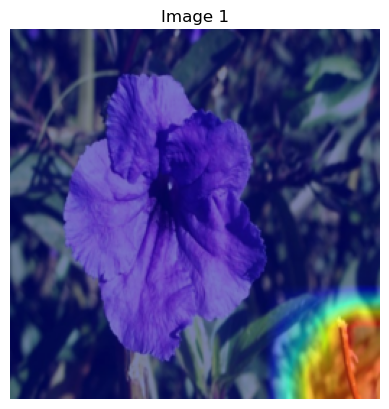

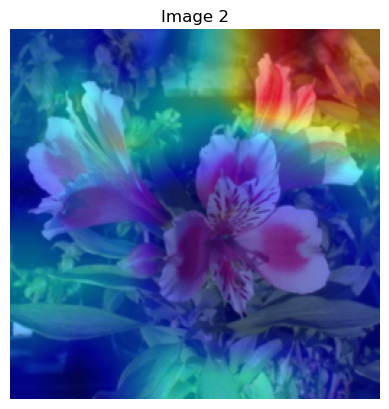

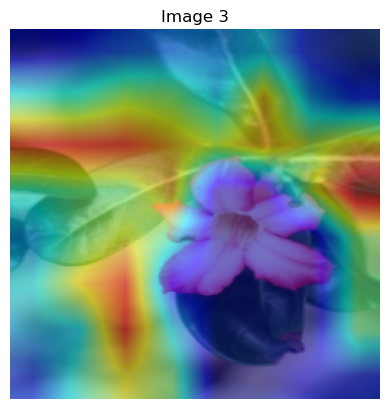

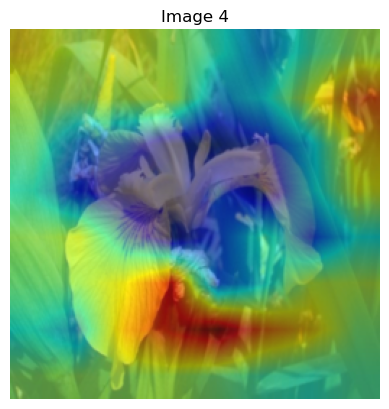

In [13]:
import random
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import matplotlib.pyplot as plt
import torch

# Prepare the dataset
rand_index = random.sample(range(len(dataset_train)), 4)
images_and_labels = [dataset_train[i] for i in rand_index]

# Separate images and labels
images = torch.stack([item[0] for item in images_and_labels])  # Shape: [4, C, H, W]
labels = [item[1] for item in images_and_labels]

# Load the pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()  # Ensure the model is in evaluation mode

# Specify the target layer for GradCAM
target_layers = [model.layer4[-1]]

# Loop through the 4 images
for i in range(len(images)):
    # Select a single image and its corresponding label
    image = images[i]  # Shape: [C, H, W]
    input_tensor = image.unsqueeze(0)  # Add batch dimension: [1, C, H, W]
    target_label = labels[i]  # Use the label corresponding to the image
    targets = [ClassifierOutputTarget(target_label)]

    # Prepare RGB image for visualization
    rgb_img = image.permute(1, 2, 0).numpy()  # Convert [C, H, W] -> [H, W, C]
    rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())  # Normalize to [0, 1]

    # Construct the CAM object and compute GradCAM
    with GradCAM(model=model, target_layers=target_layers) as cam:
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]  # Remove the batch dimension

        # Overlay the CAM on the original image
        visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # Display the visualization
    plt.figure()
    plt.imshow(visualization)
    plt.axis("off")
    plt.title(f"Image {i + 1}")
    plt.show()


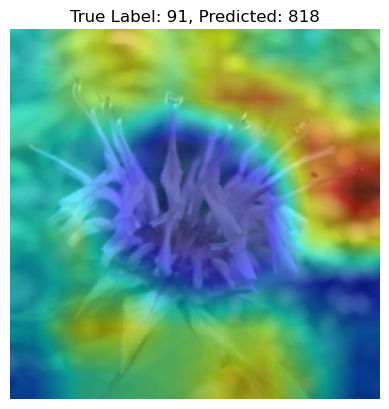

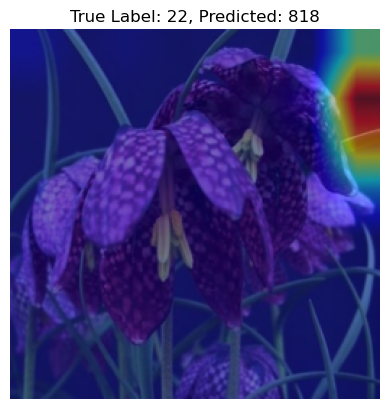

In [14]:
import random
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import models, transforms
import torch
import matplotlib.pyplot as plt

# Load your trained model
model = models.resnet50(pretrained=True)  # Replace with your trained/custom model
model.eval()

# Define your dataset and dataloader
# Assuming dataset_train contains flower images
rand_index = random.sample(range(len(dataset_train)), 4)
images_and_labels = [dataset_train[i] for i in rand_index]

# Separate images and labels
images = torch.stack([item[0] for item in images_and_labels])  # Shape: [4, C, H, W]
labels = [item[1] for item in images_and_labels]

# Define transformations for GradCAM
transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare for GradCAM
target_layers = [model.layer4[-1]]

# Classify images and determine correct/misclassified
correct = []
incorrect = []
with torch.no_grad():
    for i in range(len(images)):
        image = images[i].unsqueeze(0)  # Add batch dimension
        transformed_image = transform(image[0]).unsqueeze(0)  # Apply normalization
        outputs = model(transformed_image)
        _, predicted = outputs.max(1)
        if predicted.item() == labels[i]:
            correct.append(i)
        else:
            incorrect.append(i)

# Pick 2 correct and 2 incorrect samples
selected_images = correct[:2] + incorrect[:2]

# Visualize saliency maps for the selected images
for idx in selected_images:
    image = images[idx]
    label = labels[idx]

    # Prepare input for GradCAM
    input_tensor = image.unsqueeze(0)  # Add batch dimension
    target_class = [ClassifierOutputTarget(label)]

    # Prepare RGB image for visualization
    rgb_img = image.permute(1, 2, 0).numpy()  # Convert [C, H, W] -> [H, W, C]
    rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())  # Normalize to [0, 1]

    # Generate GradCAM
    with GradCAM(model=model, target_layers=target_layers) as cam:
        grayscale_cam = cam(input_tensor=input_tensor, targets=target_class)
        grayscale_cam = grayscale_cam[0, :]  # Remove batch dimension

        # Overlay CAM on the original image
        visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # Display results
    plt.figure()
    plt.imshow(visualization)
    plt.axis("off")
    plt.title(f"True Label: {label}, Predicted: {outputs.argmax(1).item()}")
    plt.show()



Not enough correct or incorrect predictions in the sample!


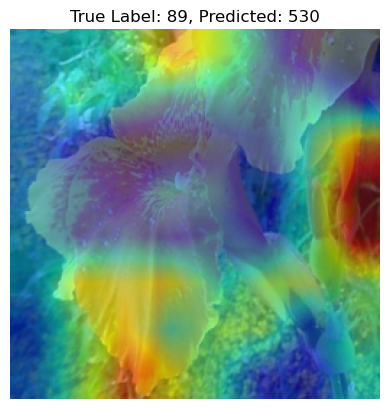

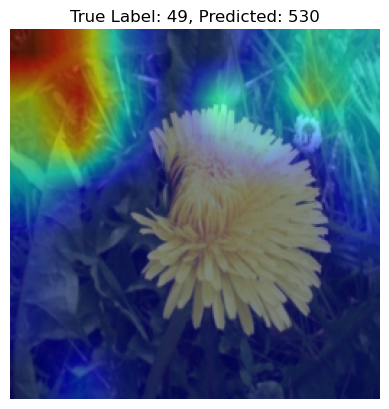

In [28]:
import random
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import models, transforms
import torch
import matplotlib.pyplot as plt

# Load your trained model
model = models.resnet50(pretrained=True)  # Replace with your trained/custom model
model.eval()

# Define your dataset and dataloader
# Assuming dataset_train contains flower images
rand_index = random.sample(range(len(dataset_train)), 4)
images_and_labels = [dataset_train[i] for i in rand_index]

# Separate images and labels
images = torch.stack([item[0] for item in images_and_labels])  # Shape: [4, C, H, W]
labels = [item[1] for item in images_and_labels]

# Define transformations for GradCAM
transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare for GradCAM
target_layers = [model.layer4[-1]]

# Classify images and determine correct/misclassified
correct = []
incorrect = []
with torch.no_grad():
    for i in range(len(images)):
        image = images[i].unsqueeze(0)  # Add batch dimension
        transformed_image = transform(image[0]).unsqueeze(0)  # Apply normalization
        outputs = model(transformed_image)
        _, predicted = outputs.max(1)
        if predicted.item() != labels[i]:
        #     correct.append(i)
        # else:
            incorrect.append(i)

# Check if enough correct/incorrect examples exist
if len(correct) < 2 or len(incorrect) < 2:
    print("Not enough correct or incorrect predictions in the sample!")

# Pick 2 correct and 2 incorrect samples
selected_images = correct[:2] + incorrect[:2]

# Visualize saliency maps for the selected images
for idx in selected_images:
    image = images[idx]
    label = labels[idx]

    # Prepare input for GradCAM
    input_tensor = image.unsqueeze(0)  # Add batch dimension
    target_class = [ClassifierOutputTarget(label)]

    # Prepare RGB image for visualization
    rgb_img = image.permute(1, 2, 0).numpy()  # Convert [C, H, W] -> [H, W, C]
    rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())  # Normalize to [0, 1]

    # Generate GradCAM
    with GradCAM(model=model, target_layers=target_layers) as cam:
        grayscale_cam = cam(input_tensor=input_tensor, targets=target_class)
        grayscale_cam = grayscale_cam[0, :]  # Remove batch dimension

        # Overlay CAM on the original image
        visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # Display results
    plt.figure()
    plt.imshow(visualization)
    plt.axis("off")
    title = f"True Label: {label}, Predicted: {outputs.argmax(1).item()}"
    plt.title(title)
    plt.show()
